
# Rede Neural Convolucional - Detecção de Tumor de Cérebro
## Desenvolvido por Ana Powarchuk Xavier
### Dataset: [Br35H :: Brain Tumor Detection 2020](https://www.kaggle.com/ahmedhamada0/brain-tumor-detection)



## Importação do Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importações de Bibliotecas

In [ ]:
import os
from PIL import Image
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
%matplotlib inline

import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize
from tensorflow.keras.utils import to_categorical

## Entrada do Dataset

In [ ]:
yes_dir = '/content/drive/MyDrive/6º semestre/Diagnóstico por Imagem I/Trabalho da Disciplina/dataset/yes'
no_dir = '/content/drive/MyDrive/6º semestre/Diagnóstico por Imagem I/Trabalho da Disciplina/dataset/no'


## Processamento de dados

### Carregamento, Redimensionando, Juntando e Legendando as Imagens



In [ ]:
# Lista de Imagens e Labels de Legenda
dataset = []
label = []

In [ ]:
# Imagens do diretório "yes" 
for imagem_yes in os.listdir(yes_dir):
  # Diretório "yes"
  imagem = os.path.join(yes_dir, imagem_yes)
  #Lendo a imagem
  imagem_yes = cv2.imread(imagem, cv2.COLOR_BGR2RGB)
  # Redimensionando as imagens
  imagem_yes = resize(imagem_yes, (256, 256, 3), mode = 'constant', preserve_range = True)
  # Normalização da imagem
  imagem_yes = ((np.array(imagem_yes)).astype('float32'))/255
  # Juntando as imagens em um dataset
  dataset.append(imagem_yes)
  # Legendando a imagem - 1: com tumor
  label.append(1)

In [ ]:
# Imagens do diretório "no" 
for imagem_no in os.listdir(no_dir):
  # Diretório "no"
  imagem = os.path.join(no_dir, imagem_no)
  #Lendo a imagem
  imagem_no = cv2.imread(imagem, cv2.COLOR_BGR2RGB)
  # Redimensionando as imagens
  imagem_no = resize(imagem_no, (256, 256, 3), mode = 'constant', preserve_range = True)
  # Normalização das imagens
  imagem_no = ((np.array(imagem_no)).astype('float32'))/255
  # Juntando as imagens em um dataset
  dataset.append(np.array(imagem_no))
  # Legendando as imagens - 0: sem tumor
  label.append(0)

## Divisão do Dataset: Separação entre Treino e Teste

In [ ]:
dataset_treino, dataset_teste, label_treino, label_teste=train_test_split(dataset, label, test_size=0.25, random_state=0)

In [ ]:
print("Imagens de treino: ", len(dataset_treino))
print("Imagens de teste: ", len(dataset_teste))

Imagens de treino:  2250
Imagens de teste:  750


## Transformação em Array

In [ ]:
# Transformando em array
dataset_treino=np.array(dataset_treino)
dataset_teste=np.array(dataset_teste)
label_treino=np.array(label_treino)
label_teste=np.array(label_teste)

## Exemplo de Dados

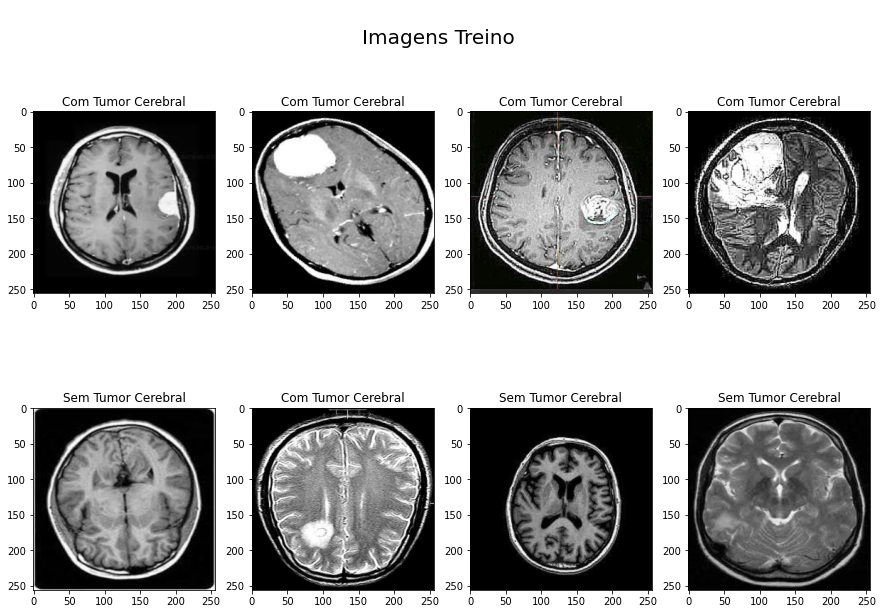

In [ ]:
# Plot de algumas imagens de treino com suas labels
fig = plt.figure(figsize=(15, 10))
fig.suptitle('\nImagens Treino', fontsize=20)

for i in range(1, 8+1):
    ax = fig.add_subplot(2, 4, i)
    if label_treino[i] == 0:
        ax.title.set_text('Sem Tumor Cerebral')
    else:
        ax.title.set_text('Com Tumor Cerebral')
    plt.imshow(dataset_treino[i])
plt.show()

## Arquitetura da Rede Neural Convolucional

In [ ]:
modelo = Sequential()  

# 1º Etapa
# Convolução
modelo.add(Conv2D(64, kernel_size=(7, 7), input_shape=(256, 256, 3), activation='relu')) 
# Pooling
modelo.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout
modelo.add(Dropout(0.25))

# 2º Etapa
# Convolução
modelo.add(Conv2D(32, (3, 3), activation = 'relu'))
# Pooling
modelo.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout
modelo.add(Dropout(0.25))

# Flattening
modelo.add(Flatten())

# Full connection - Classificação
modelo.add(Dense(128, activation = 'relu'))
modelo.add(Dense(128, activation = 'sigmoid'))
modelo.add(Dense(64, activation = 'relu'))
modelo.add(Dense(1, activation = 'sigmoid'))


modelo.compile(optimizer = Adam(lr=1e-3) , loss = "binary_crossentropy", metrics = ["accuracy"])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 250, 64)      9472      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 125, 125, 64)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 123, 123, 32)      18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 61, 61, 32)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Treino da Rede

In [ ]:
rede = modelo.fit(dataset_treino, label_treino, epochs=10, validation_data=(dataset_teste, label_teste), batch_size=64)

Epoch 1/10
36/36 [==============================] - 10s 230ms/step - loss: 0.5135 - accuracy: 0.7351 - val_loss: 0.4061 - val_accuracy: 0.8213
Epoch 2/10
36/36 [==============================] - 7s 203ms/step - loss: 0.2775 - accuracy: 0.8898 - val_loss: 0.2021 - val_accuracy: 0.9307
Epoch 3/10
36/36 [==============================] - 7s 205ms/step - loss: 0.1374 - accuracy: 0.9524 - val_loss: 0.1154 - val_accuracy: 0.9627
Epoch 4/10
36/36 [==============================] - 7s 203ms/step - loss: 0.0990 - accuracy: 0.9636 - val_loss: 0.1345 - val_accuracy: 0.9507
Epoch 5/10
36/36 [==============================] - 7s 204ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0780 - val_accuracy: 0.9707
Epoch 6/10
36/36 [==============================] - 7s 203ms/step - loss: 0.0187 - accuracy: 0.9960 - val_loss: 0.0974 - val_accuracy: 0.9733
Epoch 7/10
36/36 [==============================] - 7s 204ms/step - loss: 0.0102 - accuracy: 0.9991 - val_loss: 0.0882 - val_accuracy: 0.9760
Epoch

# Resultado

## Gráficos do Histórico do Treino

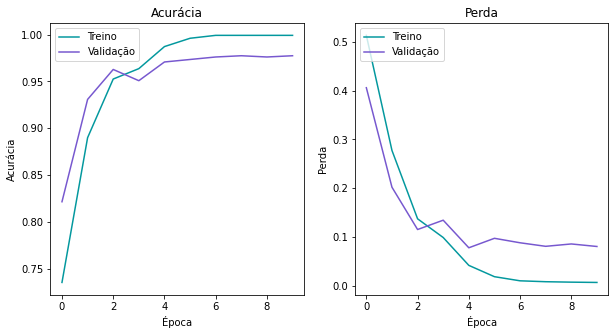

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.plot(rede.history['accuracy'], color='#03989E')
plt.plot(rede.history['val_accuracy'], color='#7758CF')
plt.legend(['Treino', 'Validação'], loc='upper left')

plt.subplot(122)
plt.title('Perda')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.plot(rede.history['loss'], color='#03989E')
plt.plot(rede.history['val_loss'], color='#7758CF')
plt.legend(['Treino', 'Validação'], loc='upper left')

plt.show()

## Teste da Rede - Matriz de Confusão

In [ ]:
label_pred_1 = modelo.predict(dataset_teste)
result_pred_1 = np.round(label_pred_1)

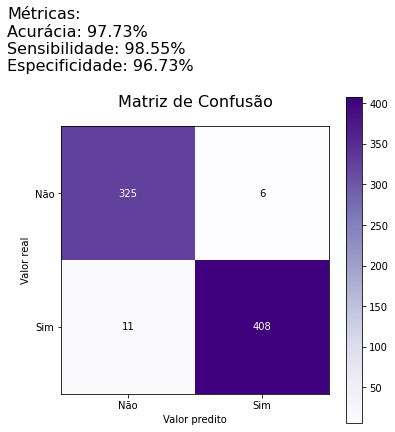

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cmat = confusion_matrix(label_teste, result_pred_1, labels=[0,1])
cmat_df = pd.DataFrame(cmat)

acuracia = np.sum(np.diag(cmat))*100/np.sum(cmat)
sensibilidade = cmat_df.iloc[1][1]/(cmat_df.iloc[0][1]+cmat_df.iloc[1][1])*100
especificidade = cmat_df.iloc[0][0]/(cmat_df.iloc[1][0]+cmat_df.iloc[0][0])*100

fig, ax = plot_confusion_matrix(conf_mat = cmat, figsize = (6,6), cmap = "Purples", colorbar= True)

ax.set_xticklabels(['','Não','Sim'])
ax.set_yticklabels(['','Não','Sim'])
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel("Valor predito")
plt.ylabel("Valor real")

text = ('Métricas:\n' + f"Acurácia: {'{:.2f}' .format(acuracia)}%\n" + f"Sensibilidade: {'{:.2f}' .format(sensibilidade)}%\n" + f"Especificidade: {'{:.2f}' .format(especificidade)}%\n" )
plt.figtext(0.0,0.9, text, ha = "left", fontsize=16)
plt.show()